In [73]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [74]:
#  Check the dataset
diabetes_dataset = load_diabetes()
# print(diabetes_dataset['DESCR'])
feature_names = diabetes_dataset.feature_names  
data = diabetes_dataset.data
target = diabetes_dataset.target

print(feature_names)
print(data.shape)
print(target.shape)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 10)
(442,)


In [75]:
# check the target data
import numpy as np
mean = np.mean(target)
max = np.max(target)
min = np.min(target)

print(f"Mean value: {mean}")
print(f"Max value: {max}")
print(f"Min value: {min}")




Mean value: 152.13348416289594
Max value: 346.0
Min value: 25.0


In [76]:
# split the data into training and test sets X_train is feature for training and X_test tis feature set for testing
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, shuffle=True
)
print(X_train.shape, X_test.shape)

(353, 10) (89, 10)


In [77]:
# Train the model, the tarrget is a continious value so regrassion analysis is suitable
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

def printFeatureImportances(model, feature_names):
    importances = model.feature_importances_
    for feature, importance in zip(feature_names, importances):
        print(f"{feature}: {importance}")

printFeatureImportances(model, feature_names)

# Predict the result
pred = model.predict(X_test[0:5])
actual = y_test[0:5]
print(pred, actual)

age: 0.06728119248288765
sex: 0.009514731315465442
bmi: 0.314684196057687
bp: 0.1000627323509202
s1: 0.048009522182072356
s2: 0.051764674966399894
s3: 0.04518668334385083
s4: 0.019858623866166537
s5: 0.2767340127106687
s6: 0.06690363072388143
[130.59 265.75 153.02 143.92 134.31] [ 87. 332.  91.  73. 201.]


In [78]:
# Evaluate the performance
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3207.172935955056


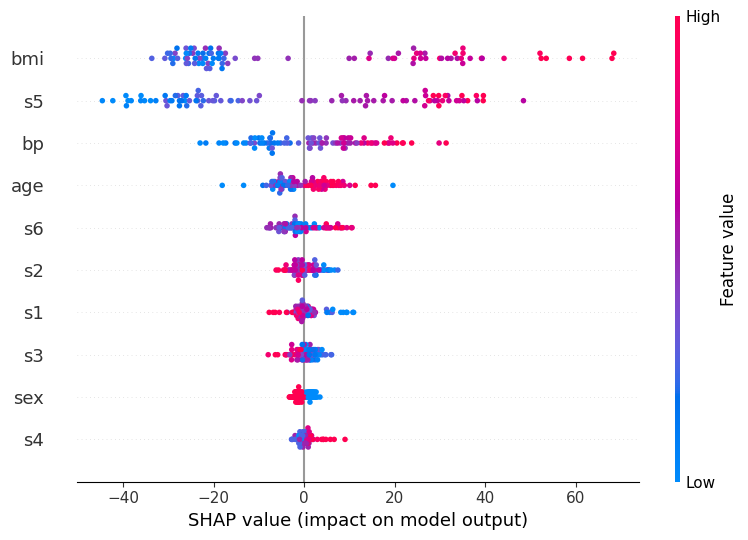

In [79]:
# Interpret the model using shap
import shap

explainer = shap.TreeExplainer(model)
# explanation = explainer(X_train)
# shap_values = explanation.values
# shap.plots.beeswarm(explanation)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

In [80]:
# Explaining single instance using force plot
# https://github.com/shap/shap/issues/977 - here, somebody nicely explained how to interpret the force plot
# https://github.com/shap/shap/tree/master/notebooks/api_examples/plots
# Formula f(x) = base_value + sum(shap_values)
instance = X_test[32].reshape(1, -1)
model_prediction = model.predict(instance)
print("Model Prediction:", model_prediction)
shap_values_single = explainer.shap_values(instance)
print("SingleShap:", shap_values_single)
print("ShapFromAbove: ", shap_values[32])
sum = np.sum(shap_values_single[0])
print("Shap Sum:", sum)
print("Base Value:", model_prediction - sum)
print("Expected value:", explainer.expected_value)
# Generate the graph to visualize single instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_single, instance, feature_names)

Model Prediction: [161.36]
SingleShap: [[ -6.78898127  -1.79076558  25.68928834 -17.31657551   0.27628928
    2.42999344  -0.35412528  -1.298525    13.76793994  -5.73258369]]
ShapFromAbove:  [ -6.78898127  -1.79076558  25.68928834 -17.31657551   0.27628928
   2.42999344  -0.35412528  -1.298525    13.76793994  -5.73258369]
Shap Sum: 8.881954674221053
Base Value: [152.47804533]
Expected value: [152.47804533]


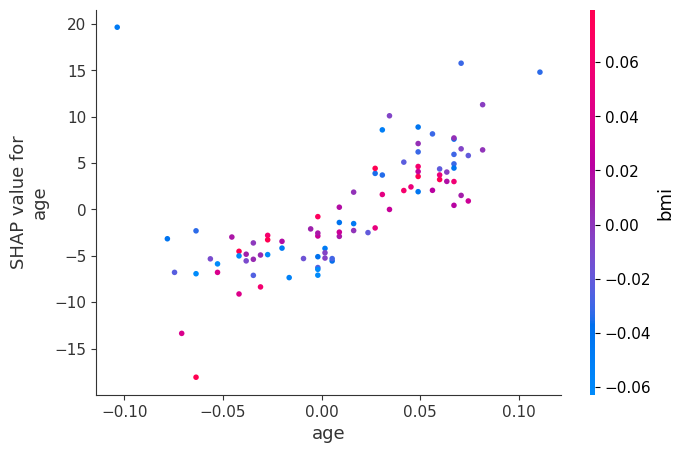

In [81]:
shap.dependence_plot(0, shap_values, X_test, feature_names=feature_names)